In [5]:
#---------------------------- Load Wavelet data
wavelet_trackdata = io.loadmat("Wavelet_PCC.mat")
wavelet_data = wavelet_trackdata['saved_data'];

#---------------------------- Load Frequency data 
freqs_trackdata = io.loadmat("Wavelet_Frequences.mat")
freqs = freqs_trackdata['saved_data'];
freqs = freqs[0]

print(wavelet_data.shape)

(349, 80, 1000)


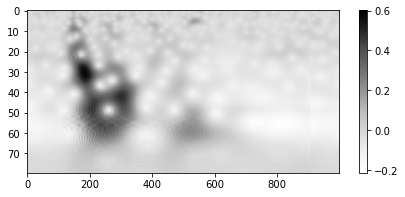

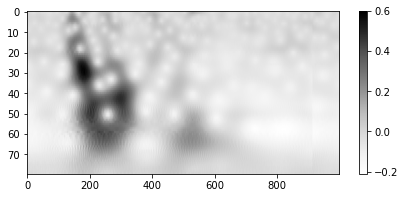

In [6]:
import matplotlib.pyplot as plt

def Plot_CWT_Small(array):
    plt.figure(1, figsize=(7,3))
    plt.imshow(array, cmap='Greys', aspect='auto')
    plt.colorbar()
    plt.show()
    
def random_crop(image, target_shape, crop_sizes): # Perform random crop, resize back to its target shape
    # image (tensor): Image to crop and resize
    # target_shape (tensor): Output shape
    # crop_sizes (list): A list of sizes the image can be cropped
    height, width = image.shape[0], image.shape[1]
    crop_size_idx = np.random.randint(0, len(crop_sizes))
    d = crop_sizes[crop_size_idx]
    x = height - d
    y = width - d
    center = np.random.randint(0, 2)
    if center:
        dx = dy = d // 2
    else:
        dx = np.random.randint(0, d + 1)
        dy = np.random.randint(0, d + 1)
    image = image[dx:(x + dx),dy:(y + dy)]
    image = resize(image, target_shape)
    return image
    

target_shape = wavelet_data.shape
img = wavelet_data[12]
crop_sizes = [10 + i for i in range(0,5,2)]
imag_bar = random_crop(img,target_shape[1:],crop_sizes)
Plot_CWT_Small(img)
Plot_CWT_Small(imag_bar)